In [1]:
import pandas as pd
import numpy as np 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 30

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format = 'svg'

In [5]:
df = pd.read_excel('_RoasUp - Data Analyst Test.xlsx', 
                       sheet_name='Data', 
                       usecols='A:N', 
                       header=1, 
                       nrows=92)

In [6]:
df.head()

,Installs,Install Day,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21
0,1686,2020-12-14,0.264872,0.361907,0.423843,0.475072,0.526918,0.561547,0.596532,0.627951,0.699627,0.802701,0.888233,0.939363
1,1646,2020-12-12,0.250064,0.364803,0.427841,0.480000,0.524888,0.563277,0.600135,0.637032,0.720009,0.811694,0.910598,0.969020
2,1546,2020-12-13,0.304624,0.418294,0.485865,0.540184,0.585254,0.627835,0.672301,0.710530,0.790887,0.905619,1.002751,1.062002
3,1292,2020-12-15,0.249199,0.342906,0.404458,0.456951,0.502346,0.535372,0.562665,0.587570,0.654223,0.755116,0.835419,0.876847
4,1227,2020-12-17,0.233380,0.318116,0.369772,0.401767,0.434319,0.461657,0.485246,0.507542,0.570324,0.651141,0.698769,0.727813


Проверим типы и полноту данных 

In [7]:
df.dtypes

Installs                int64
Install Day    datetime64[ns]
Day 0                 float64
Day 1                 float64
Day 2                 float64
Day 3                 float64
Day 4                 float64
Day 5                 float64
Day 6                 float64
Day 7                 float64
Day 10                float64
Day 14                float64
Day 18                float64
Day 21                float64
dtype: object

In [8]:
df.describe()

,Installs,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,318.521739,0.206557,0.289359,0.335783,0.370372,0.398763,0.438068,0.462977,0.486616,0.544965,0.604528,0.651475,0.680580
std,375.274214,0.055815,0.075202,0.090265,0.103662,0.115117,0.112532,0.121156,0.128058,0.144177,0.165242,0.181714,0.193911
min,16.000000,0.065692,0.083719,0.083719,0.083719,0.083719,0.089813,0.089965,0.091311,0.095622,0.106976,0.108269,0.108364
25%,85.250000,0.173464,0.241271,0.271564,0.308597,0.322391,0.377652,0.396194,0.414843,0.458729,0.508526,0.540904,0.564419
50%,198.000000,0.208960,0.293831,0.339142,0.375529,0.408653,0.451599,0.482618,0.504372,0.560826,0.623575,0.673265,0.705138
75%,361.250000,0.242396,0.342918,0.398374,0.442547,0.481464,0.513880,0.541360,0.565832,0.639331,0.724591,0.779611,0.811835
max,1686.000000,0.421951,0.530552,0.591841,0.665283,0.689266,0.722769,0.752459,0.783254,0.863860,0.906033,1.002751,1.062002


Создадим список из усредненных значений RPI

In [9]:
avg_RPI_by_daynum = df[df.columns[2:]].mean()

In [10]:
# переименование индексов
avg_RPI_by_daynum.rename(lambda x: int(x[4:]), inplace=True)

In [11]:
# добавление пропущенных номеров дней со значением None
for i in range(avg_RPI_by_daynum.index[-1]+1):
    if i not in avg_RPI_by_daynum.index: 
        avg_RPI_by_daynum[i] = np.nan

In [12]:
# сортировка по индексам
avg_RPI_by_daynum.sort_index(inplace=True)

In [13]:
# интерполяция пропущенных значений
avg_RPI_by_daynum.interpolate(method='pchip', inplace=True)

In [14]:
avg_RPI_by_daynum

0     0.206557
1     0.289359
2     0.335783
3     0.370372
4     0.398763
5     0.438068
6     0.462977
7     0.486616
8     0.507612
9     0.527114
10    0.544965
11    0.561359
12    0.576670
13    0.591020
14    0.604528
15    0.617264
16    0.629277
17    0.640652
18    0.651475
19    0.661758
20    0.671460
21    0.680580
dtype: float64

Построим усредненную кривую RPI на интервале Day0 - Day21 с интерполированными данных внутри отсутствующих дней.

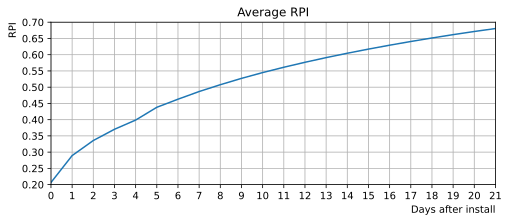

In [15]:
rcParams["figure.figsize"] = 8, 3
plt.plot(avg_RPI_by_daynum.index, avg_RPI_by_daynum)

plt.title("Average RPI")
plt.xlabel("Days after install", loc="right")
plt.ylabel("RPI", loc="top")

plt.xticks(avg_RPI_by_daynum.index)
plt.yticks(np.arange(0, 0.71, step=0.05))

plt.axis([0, 21, 0.2, 0.7])

plt.grid()

plt.show()

In [16]:
# добавление колонки с номером дня недели (от 0 до 6)
df['Install DOW num'] = df['Install Day'].dt.dayofweek

In [17]:
# добавление колонки с названием дня недели (от 0 до 6)
df['Install DOW'] = df['Install Day'].dt.day_name()

Построим графики зависимости метрики RPI в 1, 3 и 7 день после установки игры от дня недели

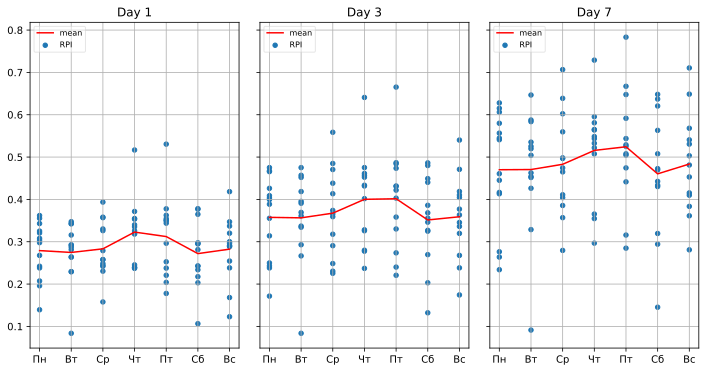

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
ax1, ax2, ax3 = ax.flatten()


fig.set_size_inches(12, 6)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax1.scatter(df['Install DOW num'], df['Day 1'], s=20)
ax1.plot(np.arange(7), [df['Day 1'][df['Install DOW num'] == i].mean() for i in range(7)], c='r')
ax1.grid()
ax1.set_title("Day 1")

ax2.scatter(df['Install DOW num'], df['Day 3'], s=20)
ax2.plot(np.arange(7), [df['Day 3'][df['Install DOW num'] == i].mean() for i in range(7)], c='r')
ax2.grid()
ax2.set_title("Day 3")

ax3.scatter(df['Install DOW num'], df['Day 7'], s=20)
ax3.plot(np.arange(7), [df['Day 7'][df['Install DOW num'] == i].mean() for i in range(7)], c='r')
ax3.grid()
ax3.set_title("Day 7")

plt.xticks(ticks=np.arange(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

for ax in ax.flatten():
    ax.legend(labels=['mean', 'RPI'], framealpha=0.5, loc='upper left', fontsize=8)

plt.show()

Добавим данные по `Day 1 Retention` и проверим полноту данных

In [19]:
df = pd.concat([df, 
                pd.read_excel('_RoasUp - Data Analyst Test.xlsx', 
                              sheet_name='Data', 
                              usecols='P', 
                              skiprows=[0], 
                              names=['Day 1 Retention'], 
                              nrows=92)
               ], axis=1)

In [20]:
df.head()

,Installs,Install Day,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Install DOW num,Install DOW,Day 1 Retention
0,1686,2020-12-14,0.264872,0.361907,0.423843,0.475072,0.526918,0.561547,0.596532,0.627951,0.699627,0.802701,0.888233,0.939363,0,Monday,0.381969
1,1646,2020-12-12,0.250064,0.364803,0.427841,0.480000,0.524888,0.563277,0.600135,0.637032,0.720009,0.811694,0.910598,0.969020,5,Saturday,0.398542
2,1546,2020-12-13,0.304624,0.418294,0.485865,0.540184,0.585254,0.627835,0.672301,0.710530,0.790887,0.905619,1.002751,1.062002,6,Sunday,0.384864
3,1292,2020-12-15,0.249199,0.342906,0.404458,0.456951,0.502346,0.535372,0.562665,0.587570,0.654223,0.755116,0.835419,0.876847,1,Tuesday,0.359133
4,1227,2020-12-17,0.233380,0.318116,0.369772,0.401767,0.434319,0.461657,0.485246,0.507542,0.570324,0.651141,0.698769,0.727813,3,Thursday,0.365933


In [21]:
df.describe()

,Installs,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Install DOW num,Day 1 Retention
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,318.521739,0.206557,0.289359,0.335783,0.370372,0.398763,0.438068,0.462977,0.486616,0.544965,0.604528,0.651475,0.680580,2.967391,0.352211
std,375.274214,0.055815,0.075202,0.090265,0.103662,0.115117,0.112532,0.121156,0.128058,0.144177,0.165242,0.181714,0.193911,2.024309,0.068758
min,16.000000,0.065692,0.083719,0.083719,0.083719,0.083719,0.089813,0.089965,0.091311,0.095622,0.106976,0.108269,0.108364,0.000000,0.166667
25%,85.250000,0.173464,0.241271,0.271564,0.308597,0.322391,0.377652,0.396194,0.414843,0.458729,0.508526,0.540904,0.564419,1.000000,0.317381
50%,198.000000,0.208960,0.293831,0.339142,0.375529,0.408653,0.451599,0.482618,0.504372,0.560826,0.623575,0.673265,0.705138,3.000000,0.359747
75%,361.250000,0.242396,0.342918,0.398374,0.442547,0.481464,0.513880,0.541360,0.565832,0.639331,0.724591,0.779611,0.811835,5.000000,0.392749
max,1686.000000,0.421951,0.530552,0.591841,0.665283,0.689266,0.722769,0.752459,0.783254,0.863860,0.906033,1.002751,1.062002,6.000000,0.500000


Построим графики зависимости метрики RPI в 1, 3 и 7 день после установки игры от `Day 1 Retention`

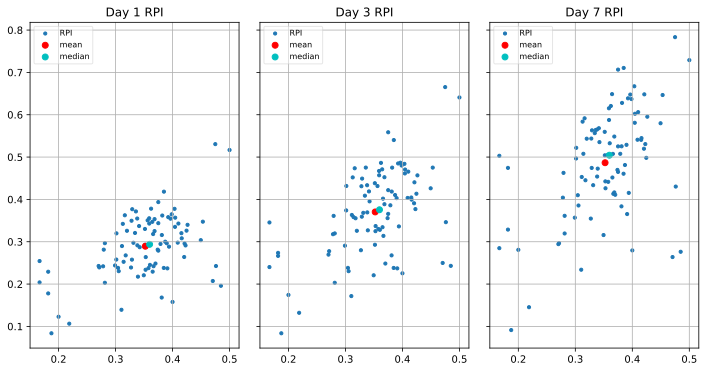

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
ax1, ax2, ax3 = ax.flatten()


fig.set_size_inches(12, 6)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax1.scatter(df['Day 1 Retention'], df['Day 1'], s=10)
ax1.scatter(df['Day 1 Retention'].mean(), df['Day 1'].mean(), c='r')
ax1.scatter(df['Day 1 Retention'].median(), df['Day 1'].median(), c='c')
ax1.grid()
ax1.set_title("Day 1 RPI")

ax2.scatter(df['Day 1 Retention'], df['Day 3'], s=10)
ax2.scatter(df['Day 1 Retention'].mean(), df['Day 3'].mean(), c='r')
ax2.scatter(df['Day 1 Retention'].median(), df['Day 3'].median(), c='c')
ax2.grid()
ax2.set_title("Day 3 RPI")

ax3.scatter(df['Day 1 Retention'], df['Day 7'], s=10)
ax3.scatter(df['Day 1 Retention'].mean(), df['Day 7'].mean(), c='r')
ax3.scatter(df['Day 1 Retention'].median(), df['Day 7'].median(), c='c')
ax3.grid()
ax3.set_title("Day 7 RPI")

for ax in ax.flatten():
    ax.legend(labels=['RPI', 'mean', 'median'], framealpha=0.5, loc='upper left', fontsize=8)

plt.show()

Можно заметить, что средний доход растет к 7му дню. Полагаю, это связано с тем, что доля активных пользователей к пассивным увеличивается.

Добавим данные по `Day 1 Ad Views` и проверим полноту данных

In [23]:
df = pd.concat([df, 
                pd.read_excel('_RoasUp - Data Analyst Test.xlsx', 
                              sheet_name='Data', 
                              usecols='AC', 
                              skiprows=[0], 
                              names=['Day 1 Ad Views'], 
                              nrows=92)
               ], axis=1)

In [24]:
df.describe()

,Installs,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Install DOW num,Day 1 Retention,Day 1 Ad Views
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,318.521739,0.206557,0.289359,0.335783,0.370372,0.398763,0.438068,0.462977,0.486616,0.544965,0.604528,0.651475,0.680580,2.967391,0.352211,6.045663
std,375.274214,0.055815,0.075202,0.090265,0.103662,0.115117,0.112532,0.121156,0.128058,0.144177,0.165242,0.181714,0.193911,2.024309,0.068758,2.532571
min,16.000000,0.065692,0.083719,0.083719,0.083719,0.083719,0.089813,0.089965,0.091311,0.095622,0.106976,0.108269,0.108364,0.000000,0.166667,0.000000
25%,85.250000,0.173464,0.241271,0.271564,0.308597,0.322391,0.377652,0.396194,0.414843,0.458729,0.508526,0.540904,0.564419,1.000000,0.317381,4.675595
50%,198.000000,0.208960,0.293831,0.339142,0.375529,0.408653,0.451599,0.482618,0.504372,0.560826,0.623575,0.673265,0.705138,3.000000,0.359747,5.921306
75%,361.250000,0.242396,0.342918,0.398374,0.442547,0.481464,0.513880,0.541360,0.565832,0.639331,0.724591,0.779611,0.811835,5.000000,0.392749,7.255615
max,1686.000000,0.421951,0.530552,0.591841,0.665283,0.689266,0.722769,0.752459,0.783254,0.863860,0.906033,1.002751,1.062002,6.000000,0.500000,18.702128


In [25]:
df.head()

,Installs,Install Day,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Install DOW num,Install DOW,Day 1 Retention,Day 1 Ad Views
0,1686,2020-12-14,0.264872,0.361907,0.423843,0.475072,0.526918,0.561547,0.596532,0.627951,0.699627,0.802701,0.888233,0.939363,0,Monday,0.381969,6.531056
1,1646,2020-12-12,0.250064,0.364803,0.427841,0.480000,0.524888,0.563277,0.600135,0.637032,0.720009,0.811694,0.910598,0.969020,5,Saturday,0.398542,6.954268
2,1546,2020-12-13,0.304624,0.418294,0.485865,0.540184,0.585254,0.627835,0.672301,0.710530,0.790887,0.905619,1.002751,1.062002,6,Sunday,0.384864,7.628571
3,1292,2020-12-15,0.249199,0.342906,0.404458,0.456951,0.502346,0.535372,0.562665,0.587570,0.654223,0.755116,0.835419,0.876847,1,Tuesday,0.359133,5.170259
4,1227,2020-12-17,0.233380,0.318116,0.369772,0.401767,0.434319,0.461657,0.485246,0.507542,0.570324,0.651141,0.698769,0.727813,3,Thursday,0.365933,4.734967


Построим графики зависимости метрики RPI в 1, 3 и 7 день после установки игры от `Day 1 Ad Views`

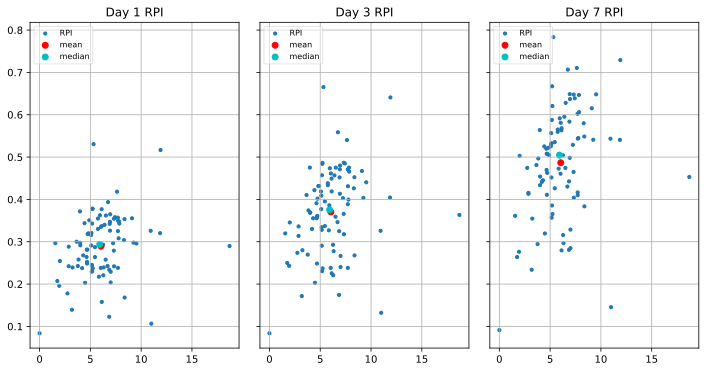

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
ax1, ax2, ax3 = ax.flatten()


fig.set_size_inches(12, 6)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax1.scatter(df['Day 1 Ad Views'], df['Day 1'], s=10)
ax1.scatter(df['Day 1 Ad Views'].mean(), df['Day 1'].mean(), c='r')
ax1.scatter(df['Day 1 Ad Views'].median(), df['Day 1'].median(), c='c')
ax1.grid()
ax1.set_title("Day 1 RPI")

ax2.scatter(df['Day 1 Ad Views'], df['Day 3'], s=10)
ax2.scatter(df['Day 1 Ad Views'].mean(), df['Day 3'].mean(), c='r')
ax2.scatter(df['Day 1 Ad Views'].median(), df['Day 3'].median(), c='c')
ax2.grid()
ax2.set_title("Day 3 RPI")

ax3.scatter(df['Day 1 Ad Views'], df['Day 7'], s=10)
ax3.scatter(df['Day 1 Ad Views'].mean(), df['Day 7'].mean(), c='r')
ax3.scatter(df['Day 1 Ad Views'].median(), df['Day 7'].median(), c='c')
ax3.grid()
ax3.set_title("Day 7 RPI")

for ax in ax.flatten():
    ax.legend(labels=['RPI', 'mean', 'median'], framealpha=0.5, loc='upper left', fontsize=8)

plt.show()

Можно заметить, что средний доход растет к 7му дню. Полагаю, это, как и в предыдущем случаем, связано с тем, что доля активных пользователей к пассивным увеличивается.

### Переведем категориальные признаки в бинарные и удалим лишние поля

In [27]:
df.head()

,Installs,Install Day,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Install DOW num,Install DOW,Day 1 Retention,Day 1 Ad Views
0,1686,2020-12-14,0.264872,0.361907,0.423843,0.475072,0.526918,0.561547,0.596532,0.627951,0.699627,0.802701,0.888233,0.939363,0,Monday,0.381969,6.531056
1,1646,2020-12-12,0.250064,0.364803,0.427841,0.480000,0.524888,0.563277,0.600135,0.637032,0.720009,0.811694,0.910598,0.969020,5,Saturday,0.398542,6.954268
2,1546,2020-12-13,0.304624,0.418294,0.485865,0.540184,0.585254,0.627835,0.672301,0.710530,0.790887,0.905619,1.002751,1.062002,6,Sunday,0.384864,7.628571
3,1292,2020-12-15,0.249199,0.342906,0.404458,0.456951,0.502346,0.535372,0.562665,0.587570,0.654223,0.755116,0.835419,0.876847,1,Tuesday,0.359133,5.170259
4,1227,2020-12-17,0.233380,0.318116,0.369772,0.401767,0.434319,0.461657,0.485246,0.507542,0.570324,0.651141,0.698769,0.727813,3,Thursday,0.365933,4.734967


In [28]:
df = pd.concat([df, 
                pd.get_dummies(pd.DataFrame({'Install DOW':df['Install DOW']}), 
                               prefix=['dow'], 
                               prefix_sep='_', 
                               drop_first=True, 
                               dtype='int64')
               ], axis=1)

In [29]:
df.drop(['Install Day', 'Install DOW', 'Install DOW num'], axis=1, inplace=True)
df.head()

,Installs,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Day 1 Retention,Day 1 Ad Views,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,1686,0.264872,0.361907,0.423843,0.475072,0.526918,0.561547,0.596532,0.627951,0.699627,0.802701,0.888233,0.939363,0.381969,6.531056,1,0,0,0,0,0
1,1646,0.250064,0.364803,0.427841,0.480000,0.524888,0.563277,0.600135,0.637032,0.720009,0.811694,0.910598,0.969020,0.398542,6.954268,0,1,0,0,0,0
2,1546,0.304624,0.418294,0.485865,0.540184,0.585254,0.627835,0.672301,0.710530,0.790887,0.905619,1.002751,1.062002,0.384864,7.628571,0,0,1,0,0,0
3,1292,0.249199,0.342906,0.404458,0.456951,0.502346,0.535372,0.562665,0.587570,0.654223,0.755116,0.835419,0.876847,0.359133,5.170259,0,0,0,0,1,0
4,1227,0.233380,0.318116,0.369772,0.401767,0.434319,0.461657,0.485246,0.507542,0.570324,0.651141,0.698769,0.727813,0.365933,4.734967,0,0,0,1,0,0


In [30]:
df.describe()

,Installs,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 10,Day 14,Day 18,Day 21,Day 1 Retention,Day 1 Ad Views,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,318.521739,0.206557,0.289359,0.335783,0.370372,0.398763,0.438068,0.462977,0.486616,0.544965,0.604528,0.651475,0.680580,0.352211,6.045663,0.152174,0.141304,0.141304,0.141304,0.141304,0.141304
std,375.274214,0.055815,0.075202,0.090265,0.103662,0.115117,0.112532,0.121156,0.128058,0.144177,0.165242,0.181714,0.193911,0.068758,2.532571,0.361158,0.350244,0.350244,0.350244,0.350244,0.350244
min,16.000000,0.065692,0.083719,0.083719,0.083719,0.083719,0.089813,0.089965,0.091311,0.095622,0.106976,0.108269,0.108364,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.250000,0.173464,0.241271,0.271564,0.308597,0.322391,0.377652,0.396194,0.414843,0.458729,0.508526,0.540904,0.564419,0.317381,4.675595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,198.000000,0.208960,0.293831,0.339142,0.375529,0.408653,0.451599,0.482618,0.504372,0.560826,0.623575,0.673265,0.705138,0.359747,5.921306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,361.250000,0.242396,0.342918,0.398374,0.442547,0.481464,0.513880,0.541360,0.565832,0.639331,0.724591,0.779611,0.811835,0.392749,7.255615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1686.000000,0.421951,0.530552,0.591841,0.665283,0.689266,0.722769,0.752459,0.783254,0.863860,0.906033,1.002751,1.062002,0.500000,18.702128,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разделим датасет на теренировочную и тестовую выборки

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Day 21'], axis=1), df[['Day 21']], random_state=0)

Нормализуем признаки

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Обучим модель методом Линейной регрессии

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test_scaled)

y_pred.shape

(23, 1)

In [38]:
from sklearn.metrics import mean_squared_error as mse

In [39]:
mse(y_test, y_pred)

0.00019591847384211897

In [40]:
from sklearn.metrics import r2_score as r2

In [41]:
r2(y_test, y_pred)

0.9948894659218717

Здесь я понял, что делаю что-то не то, чтобы прийти к предсказанию дохода на Day28

Далее следует интерполяция Day28 RPI на данных RPI за предыдущие дни (что не предлагается как решение задачи)

In [42]:
avg_RPI_by_daynum[28] = np.nan

In [43]:
# интерполяция пропущенных значений
avg_RPI_by_daynum.interpolate(method='pchip', inplace=True)

In [44]:
avg_RPI_by_daynum

0     0.206557
1     0.289359
2     0.335783
3     0.370372
4     0.398763
5     0.438068
6     0.462977
7     0.486616
8     0.507612
9     0.527114
10    0.544965
11    0.561359
12    0.576670
13    0.591020
14    0.604528
15    0.617264
16    0.629277
17    0.640652
18    0.651475
19    0.661758
20    0.671460
21    0.680580
28    0.724618
dtype: float64

In [45]:
avg_RPI_by_daynum[28]

0.7246175011031295

Построим усредненную кривую RPI на интервале Day0 - Day28 с интерполированными данных внутри отсутствующих дней.

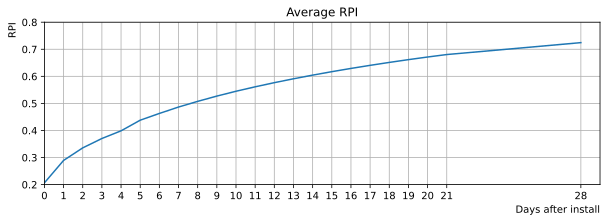

In [46]:
rcParams["figure.figsize"] = 10, 3
plt.plot(avg_RPI_by_daynum.index, avg_RPI_by_daynum)

plt.title("Average RPI")
plt.xlabel("Days after install", loc="right")
plt.ylabel("RPI", loc="top")

plt.xticks(avg_RPI_by_daynum.index)
# plt.yticks(np.arange(0, 0.71, step=0.05))

plt.axis([0, 29, 0.2, 0.8])

plt.grid()

plt.show()